In [37]:
from sklearn.linear_model import RidgeClassifier
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix



In [38]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#import the data
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# explore the data

In [39]:
print("Shape of training data:")
print(x_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(x_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


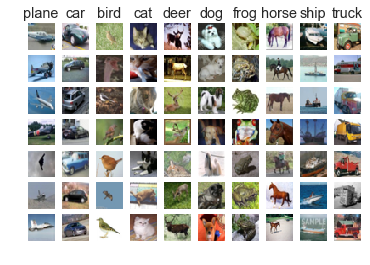

In [40]:
import numpy as np
import matplotlib.pyplot as plt
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(x_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

# preprocess the data

In [41]:
#shuffle the training data
import numpy as np
shuffle_index = np.random.permutation(50000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

In [42]:
from sklearn.preprocessing import StandardScaler  
x_train =np.reshape(x_train, (50000,3072))
y_train=np.reshape(y_train, (50000,))
x_test =np.reshape(x_test, (10000,3072))
y_test =np.reshape(y_test, (10000,))
scaler = StandardScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test) 

/Users/navya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/navya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/navya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# train thee model using SGD classifier

In [44]:
from sklearn.datasets.mldata import fetch_mldata
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
              
ML_model = SGDClassifier(random_state= 32)
ML_model.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=32, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [62]:
# Cross Validation for predicting training error
#No of K = 3; 
cross_val = Cross_validation(3, x_train, y_train, model= ML_model);
cross_val.fit()
Train_pred_y = cross_val.predict(x_train);
print('Traning Accuracy is = ' + str(cross_val.score(y_train, Train_pred_y) * 100) + '%')


Model Accuracy = 0.3692261547690462
Model Accuracy = 0.37030593881223756
Model Accuracy = 0.38271308523409364
Traning Accuracy is = 40.042%


In [63]:
# Test Error calculation 
Test_pred_y = ML_model.predict(x_test);
test_accuracy = sum(Test_pred_y == y_test);

print('Generalization Accuracy = ' + str(test_accuracy/len(Test_pred_y) * 100)+ '%');

Generalization Accuracy = 38.550000000000004%


In [58]:
#Confusion Matrix 
conf_mat = confusion_matrix(y_test, Test_pred_y)
print('----------------Confusion Matrix-----------------')
print(conf_mat)

----------------Confusion Matrix-----------------
[[445  53 145  25  25  15  11  48 164  69]
 [ 62 447  59  53  45  34  32  45  79 144]
 [ 72  26 416  79 152  66  63  58  52  16]
 [ 33  34 196 256 109 142  73  55  44  58]
 [ 40  17 240  66 375  54  67  94  24  23]
 [ 23  30 220 148 115 253  53  76  62  20]
 [ 13  22 168 156 181  66 304  36  18  36]
 [ 39  32 143  52 112  71  22 409  53  67]
 [159  81  56  24  22  37   7  18 500  96]
 [ 84 152  31  38  36  19  35  56  97 452]]


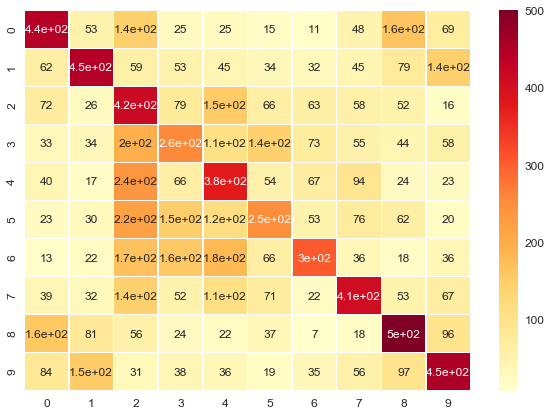

In [59]:
#visualising the confusion matrix
import seaborn as sn
import pandas  as pd
 
df_cm = pd.DataFrame(conf_mat, range(10), range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.2)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12},linewidths=.5, cmap='YlOrRd')# font size
plt.show()
